# TP Algorithme de Runge Kutta

**Document à rendre au plus tard le 25 septembre à 18h00**

Nom : Blanchon

Prénom : Julien

## Introduction

Il est rappelé que les programmes doivent respecter les **bonnes pratiques de la programmation**. En particulier on vérifiera que les interfaces soient bien définies (paramètres en entrée, en sortie avec leurs types, les dimensions, ...). Dans le cas contraire on mettra des **points négatifs** pour un maximum de 4 points.

On rappelle qu'un schéma de Runge Kutta à $s$ étage est défini par
\begin{equation}\label{eq:irk}
(S)\left\{\begin{array}{l}
k_i=f(t_0+c_ih,x_0+h\sum_{j=1}^{s}a_{ij}k_j)\quad \textrm{pour}\;\;i=1,\ldots,s\\
x_1=x_0+h\sum_{i=1}^{s}b_ik_i
\end{array}\right.
\end{equation}
où les coefficients $c_i,a_{ij}$ et $b_i$ sont des constantes qui définissent précisément le schéma. On supposera toujours dans la suite que  $c_i=\sum_{j=1}^{s}a_{ij}$ pour $i=1,\ldots,s$. 

On représente en pratique ce schéma par le tableau de Butcher
$$
\begin{array}{c|ccc}
c_1    & a_{11} & \ldots & a_{1s}\\
\vdots & \vdots &        & \vdots\\ 
c_s    & a_{s1} & \ldots & a_{ss}   \\ \hline
       & b_1    & \ldots & b_s\\
\end{array}$$

Si la matrice des coefficient $A$ est triangulaire inférieure stricte alors le schéma est explicite, sinon il est implicite.

On donne ci après les schémas les plus courant

$$\begin{array}[t]{ccc}
\begin{array}{c}
\\ \\
\begin{array}{c|c}
0 &   \\\hline
 & 1
\end{array}
\end{array}
& \begin{array}{c}
\\
\begin{array}{c|cc}
0 &  &\\
1/2 & 1/2 &\\ \hline
 & 0 & 1
\end{array}
\end{array}
& \begin{array}{c|ccc}
0 &  &  & \\
1/3 & 1/3 & & \\
2/3 & 0 & 2/3 & \\ \hline
 & 1/4 & 0 & 3/4
\end{array}\\
\textrm{Euler} & \textrm{Runge} & \textrm{Heun}
\end{array}$$
$$\begin{array}[t]{cc}
\begin{array}{c|cccc}
0 &  &  & &\\
1/2 & 1/2 & & &\\
1/2 & 0 & 1/2 & &\\ 
1 &   0 & 0   & 1 &\\ \hline
 & 1/6 & 2/6 & 2/6 & 1/6
\end{array}
& \begin{array}{c|cc}
1/2-\sqrt{3}/6 & 1/4 & 1/4-\sqrt{3}/6\\
1/2+\sqrt{3}/6 & 1/4+\sqrt{3}/6 & 1/4\\ \hline
 & 1/2 & 1/2
\end{array}\\
\textrm{La méthode Rk4} & \textrm{Gauss d'ordre 4}
\end{array}$$


In [2]:
using LinearAlgebra
# import Pkg; Pkg.add("Printf")

## Les méthodes de Runge Kutta explicites

In [3]:
function euler(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real},
        N::Integer)::Tuple{Vector{Float64},Array{Float64,2}}
    # Numerical integration via Euler scheme
    # Input
    # -----
    # fun : second member of the ode
    #       xpoint = fun(x,p,t)
    #       xpoint : value of fun
    #               array(n)
    #       x      : state
    #                array(n)
    #       p      : vector of parameter
    #       t      : time
    #                real
    # tspan : (t0, tf)
    # x0 : initial condition
    #       array(n)
    # p  : vector of parameters
    # N  : number of step
    #      integer
    # Output
    # ------
    # T   : vector of time
    #       array(N+1)
    # X   : X[i,:] is the approximation of x(t_i)
    #       array(N+1,n)
    # ----------------------------------------------
    n  = length(x0)             # dimension n
    T  = zeros(N+1)
    X  = zeros(N+1,n)
    
    t0, tf = tspan
    h = (tf-t0)/N
    T = range(t0, stop=tf, length=N+1)
    #T = t0:h:tf
    X[1, :] = x0
    for i in 1:N
        k_1 = fun(X[i, :], p, T[i])
        X[i+1, :] = X[i, :] + h*k_1
    end
    return T,X
end

euler (generic function with 1 method)

In [4]:
function runge(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real}, N::Integer)
# Numerical integration via the runge scheme
# the same as Euler
# ----------------------------------------------

    n  = length(x0)             # dimension n
    T  = zeros(N+1)
    X  = zeros(N+1,n)

    t0, tf = tspan
    h = (tf-t0)/N
    T = range(t0, stop=tf, length=N+1)
    #T = t0:h:tf
    X[1, :] = x0
    for i in 1:N
        k_1 = fun(X[i, :], p, T[i])
        k_2 = fun(X[i, :] .+ 0.5*h*k_1, p, T[i] + 0.5*h) 
        Phi = 0*k_1 + 1*k_2
        X[i+1, :] = X[i, :] + h*Phi
    end
    return T,X
end

runge (generic function with 1 method)

In [5]:
function heun(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real}, N::Integer)
# Numerical integration via the Heun scheme
# the same as Euler
# ----------------------------------------------

    n  = length(x0)             # dimension n
    T  = zeros(N+1)
    X  = zeros(N+1,n)
    
    t0, tf = tspan
    h = (tf-t0)/N
    T = range(t0, stop=tf, length=N+1)
    #T = t0:h:tf
    X[1, :] = x0
    for i in 1:N
        k_1 = fun(X[i, :] .+ 0*h, p, T[i] + 0*h)
        k_2 = fun(X[i, :] .+ (1//3)*h*k_1, p, T[i] + (1//3)*h)
        k_3 = fun(X[i, :] .+ (2//3)*h*k_2, p, T[i] + (2//3)*h)
        Phi = (1//4)*k_1 + 0*k_2 + (3//4)*k_3
        X[i+1, :] = X[i, :] + h*Phi
    end
    return T,X
end

heun (generic function with 1 method)

In [6]:
function rk4(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real}, N::Integer)
# Numerical integration via the RK4 scheme
# the same as Euler
# ----------------------------------------------
    n  = length(x0)             # dimension n
    T  = zeros(N+1)
    X  = zeros(N+1,n)
    
    t0, tf = tspan
    h = (tf-t0)/N
    T = range(t0, stop=tf, length=N+1)
    #T = t0:h:tf
    X[1, :] = x0
    for i in 1:N
        k_1 = fun(X[i, :] .+ 0*h, p, T[i] + 0*h)
        k_2 = fun(X[i, :] .+ (1/2)*h*k_1, p, T[i] + (1/2)*h)
        k_3 = fun(X[i, :] .+ (1/2)*h*k_2, p, T[i] + (1/2)*h)
        k_4 = fun(X[i, :] .+ 1*h*k_3, p, T[i] + 1*h)
        Phi = (1/6)*k_1 + (2/6)*k_2 + (2/6)*k_3 + (1/6)*k_4
        X[i+1, :]=X[i, :] + h*Phi
    end
    return T,X
end

rk4 (generic function with 1 method)

## Vérification des résultats dans le cas N = 10

In [7]:
function vdp(x::Vector{<:Real},p::Vector{<:Real},t::Real)
# Van der Pol model
# second member of the IVP
# p : paramter vector
# t : time, variable not use here
    xpoint = similar(x)
    xpoint[1] = x[2]
    xpoint[2] = (1-x[1]^2)*x[2]-x[1]
    return xpoint
end

function affiche(T,X)
# Affiche les résulats : utile pour vérifier que l'on a les résultats attendus pour N=25
#
    N = length(T)-1
    for i in 1:N+1
        @printf("%20.15f %20.15f %20.15f\n", T[i],X[i,1],X[i,2])
    end
end

mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N = 10

println("Euler")
T_Euler,X_Euler = euler(vdp, tspan, x0, p, N)
affiche(T_Euler,X_Euler)

println("Runge")
T_Runge,X_Runge = runge(vdp, tspan, x0, p, N)
affiche(T_Runge,X_Runge)

println("Heun")
T_Heun,X_Heun = heun(vdp, tspan, x0, p, N)
affiche(T_Heun,X_Heun)

println("RK4")
T_RK4,X_RK4 = rk4(vdp, tspan, x0, p, N)
affiche(T_RK4,X_RK4)

Euler
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    2.008619860874843   -1.338401032434280
   1.332657371864626    1.116804859682459    0.029458487293659
   1.998986057796939    1.136433894810396   -0.719553966980973
   2.665314743729252    0.656974445534582   -1.337038672872153
   3.331643429661565   -0.233932776401004   -2.281177517157184
   3.997972115593878   -1.753946793786687   -3.562133341262534
   4.664300801526191   -4.127498422185830    2.534846643721279
   5.330629487458504   -2.438457389035097  -21.800755581293878
   5.996958173390817  -16.964926207850183   51.673054627620850
   6.663286859323130   17.466312380281039 -9812.202238480942469
Runge
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    1.562712360278651    0.014729243646829
   1.332657371864626    1.220894137875029   -0.531644111154892
   1.998986057796939    0.653509832528317   -1.176382554058143
   2.665314743729252   -0.425046060567530 

## Graphiques de la figure 2, cas N = 25

In [8]:
using Plots

In [9]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N = 25

T_Euler,X_Euler = euler(vdp, tspan, x0, p, N)
T_Runge,X_Runge = runge(vdp, tspan, x0, p, N)
T_Heun,X_Heun = heun(vdp, tspan, x0, p, N)
T_RK4,X_RK4 = rk4(vdp, tspan, x0, p, N)

(0.0:0.26653147437292524:6.66328685932313, [2.0086198608748433 0.0; 1.9527743884676043 -0.365872406713537; … ; 1.912368984556861 0.8036695680090611; 2.007954412978882 0.007905916258423296])

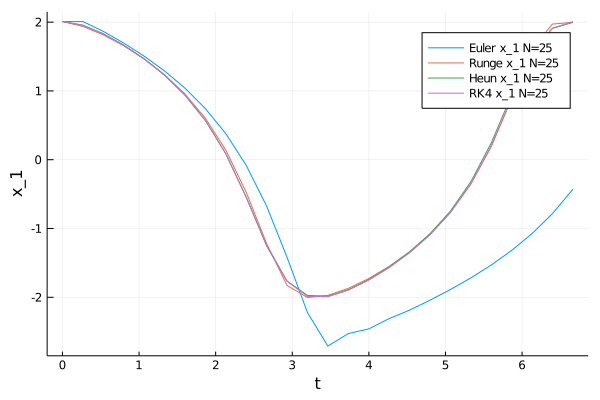

In [10]:
plot(T_Euler, X_Euler[:, 1], label = "Euler x_1 N=25", lw = 1)
plot!(T_Runge, X_Runge[:, 1], label = "Runge x_1 N=25", lw = 1)
plot!(T_Heun, X_Heun[:, 1], label = "Heun x_1 N=25", lw = 1)
plot!(T_RK4, X_RK4[:, 1], label = "RK4 x_1 N=25", lw = 1)
xlabel!("t")
ylabel!("x_1")

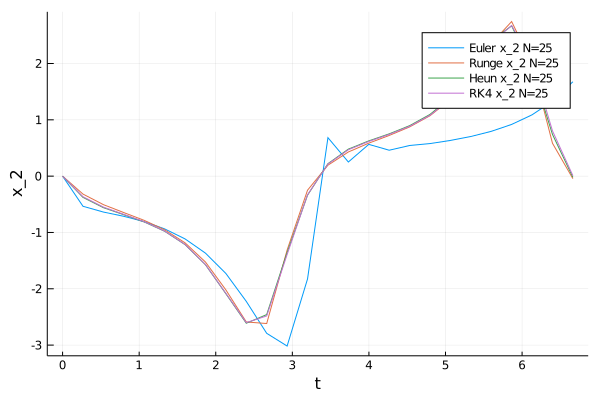

In [11]:
plot(T_Euler, X_Euler[:, 2], label = "Euler x_2 N=25", lw = 1)
plot!(T_Runge, X_Runge[:, 2], label = "Runge x_2 N=25", lw = 1)
plot!(T_Heun, X_Heun[:, 2], label = "Heun x_2 N=25", lw = 1)
plot!(T_RK4, X_RK4[:, 2], label = "RK4 x_2 N=25", lw = 1)
xlabel!("t")
ylabel!("x_2")

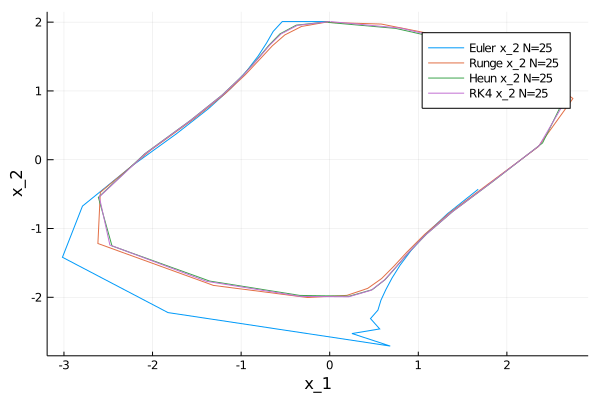

In [12]:
plot(X_Euler[:, 2], X_Euler[:, 1], label = "Euler x_2 N=25", lw = 1)
plot!(X_Runge[:, 2], X_Runge[:, 1], label = "Runge x_2 N=25", lw = 1)
plot!(X_Heun[:, 2], X_Heun[:, 1], label = "Heun x_2 N=25", lw = 1)
plot!(X_RK4[:, 2], X_RK4[:, 1], label = "RK4 x_2 N=25", lw = 1)
xlabel!("x_1")
ylabel!("x_2")

## Ordre pour les méthodes explicites
On demande de réaliser la figure 1 uniquement pour la première variable

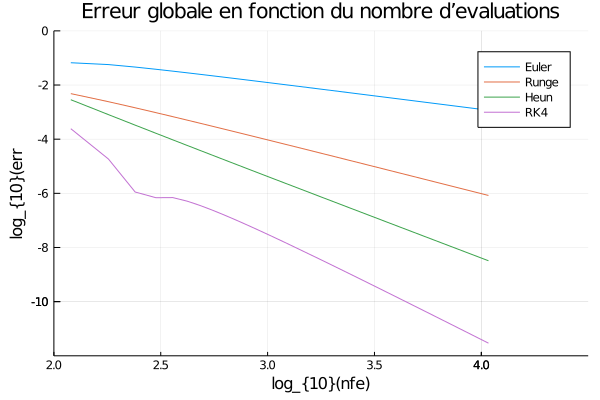

In [26]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N0 = [collect(120:60:1080); collect(1200:600:10800)]
Nmax = length(N0)
err_Euler = zeros(Nmax)
err_Runge = zeros(Nmax)
err_Heun = zeros(Nmax)
err_RK4 = zeros(Nmax)

for i in 1:Nmax
    #s=1 donc N = nfe
    T_Euler, X_Euler = euler(vdp, tspan, x0, p, Int(N0[i]))
    err_Euler[i] = abs(x0[1] - last(X_Euler[:,1]))
    
    #s=2 donc N = nfe/2
    T_Runge, X_Runge = runge(vdp, tspan, x0, p, Int(N0[i]/2))
    err_Runge[i] = abs(x0[1] - last(X_Runge[:,1]))

    #s=3 donc N = nfe/3
    T_Heun, X_Heun = heun(vdp, tspan, x0, p, Int(N0[i]/3))
    err_Heun[i] = abs(x0[1] - last(X_Heun[:,1]))

    #s=4 donc N = nfe/4
    T_RK4, X_RK4 = rk4(vdp, tspan, x0, p, Int(N0[i]/4))
    err_RK4[i] = abs(x0[1] - last(X_RK4[:,1]))
end

plot(log10.(N0), log10.(err_Euler), label = "Euler")
plot!(log10.(N0), log10.(err_Runge), label = "Runge")
plot!(log10.(N0), log10.(err_Heun), label = "Heun")
plot!(log10.(N0), log10.(err_RK4), label = "RK4")
xlabel!("log_{10}(nfe)")
ylabel!("log_{10}(err")
xlims!(2, 4.5)
ylims!(-12, 0)
title!("Erreur globale en fonction du nombre d’evaluations")


## Runge Kutta implicite, schéma de Gauss
### Point fixe
#### Code


In [14]:
function gauss_fp(fun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real},
        option)::Tuple{Vector{Float64},Array{Float64,2},Int,Array{Int,1}}
    # Numerical integration with Gauss scheme and the fixed point algorithm
    #
    # Input parameters
    # ----------------
    # fun : second member of the ode
    #       fun(x,p,t)
    #       Input
    #       x      : state
    #                array(n)
    #       p      : vector of parameters
    #       t      : time
    #                real
    #       Output
    #       xpoint : value of fun
    #               array(n) 
    # tspan = (t0,tf)
    # x0    = initial point
    #         array(n)
    # option[1] = N = number of step
    #                 Integer
    # option[2] = maximum number of iterations for the fixed point
    #             real
    # option[3] = epsilon for the test of progress in the fixed point
    #             real
    #
    # Output parameters
    # -----------------
    # T = vector of time
    #     real(N+1)
    # X = Matrix of solution
    #     real(N+1,n)
    # The line i of [T X] contains ti and x_i the approximation of x(t_i)
    # ifail[i] = number of iteration for the fixed point on [t_i,t_{i+1}] if the fixed point converge
    # ifail[i] = -1 if the fixed point don't converge on [t_i,t_{i+1}]: maximum number of iteration
    # is attained in the fixed point
    #            integer(N)
    # nfun = number of evaluation of phi
    #        integer
    # ndfun = number of evaluation of the derivative of fun
    #         integer
    # ---------------------------------------------------------------------------------------------
    #
    # Initialisation
    # --------------
    # Coefficent of the Butcher's array
    N, nb_itmax, eps = option
    N = Int(N)
    nb_it = 0
    
    n  = length(x0)             # dimension n
    T  = zeros(N+1)
    X  = zeros(N+1, n)
    nfun = 0
    ndfun = 0
    ifail = ones(Int, N)

    t0, tf = tspan
    h = (tf-t0)/N
    T = range(t0, stop=tf, length=N+1)
    #T = t0:h:tf
    X[1, :] = x0
    for i in 1:N
        k_1 = fun(X[i, :], p, T[i] + ((1/4) - (sqrt(3)/6))*h) #On initialise (k1)_0
        k_2 = fun(X[i, :], p, T[i] + ((1/4) + (sqrt(3)/6))*h) #On initialise (k2)_0
        k_1b, k_2b = 0, 0
        nfun += 2
        nb_it += 1

        delta = 2*eps*ones(2) #Valeur par défaut pour rentrer dans la boucle
        nb_it = 0 #Itération des suites (k_1) et (k_2)
        
        #Point fixe
        while maximum(delta) > eps && nb_it <= nb_itmax
            k_1b = fun(X[i, :] + h*(1/4)*k_1 + h*(1/4 - sqrt(3)/6)*k_2, p, T[i] + ((1/2) - (sqrt(3)/6))*h) #(k1)_n
            k_2b = fun(X[i, :] + h*(1/4 + sqrt(3)/6)*k_1 + h*(1/4)*k_2, p, T[i] + ((1/2) + (sqrt(3)/6))*h) #(k2)_n
            nfun += 2
            nb_it += 1
            
            delta = [norm(k_1b-k_1), norm(k_2b-k_2)]
            k_1, k_2 = k_1b, k_2b
        end
        
        if nb_it > nb_itmax
            ifail[i] = -1
        else
            ifail[i] = nb_it
        end

        Phi = (1/2)*k_1 + (1/2)*k_2
        X[i+1, :] = X[i, :] + h*Phi 
    end
    
    return T, X, nfun, ifail
end

gauss_fp (generic function with 1 method)

#### Test dans le cas N = 10, nb_itmax = 15 et K_eps = 1.e-12

In [31]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N = 10
nb_itmax = 15
K_eps = 1e-12
option = [10, nb_itmax, K_eps]

println("Gauss fp")
T_Gaussfp, X_Gaussfp, nfun_Gaussfp, ifail_Gaussfp = gauss_fp(vdp, tspan, x0, p, option)
affiche(T_Gaussfp,X_Gaussfp)

Gauss fp
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    1.748107298061437   -0.614534755122251
   1.332657371864626    1.227167539403024   -0.975645810334489
   1.998986057796939    0.345198742134741   -1.812016428573771
   2.665314743729252   -1.241639747834137   -2.475100253843413
   3.331643429661565   -2.013907283870696   -0.001158570214112
   3.997972115593878   -1.753896022475808    0.612906376157586
   4.664300801526191   -1.235025355750548    0.970521740428176
   5.330629487458504   -0.359135069415425    1.797490986968684
   5.996958173390817    1.222259731557591    2.495429503515484
   6.663286859323130    2.014632160384476    0.015691390850674


#### Graphique 2

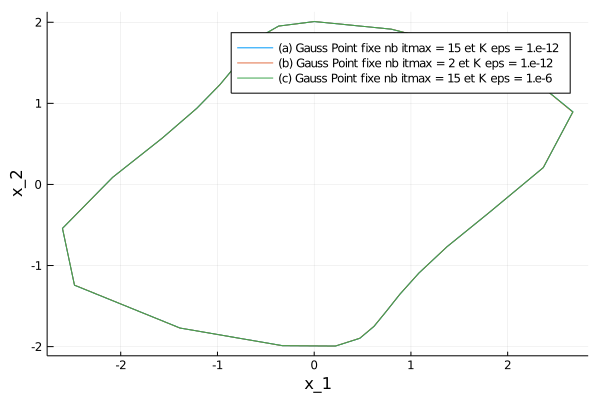

In [25]:
using Plots
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N = 25

T_Gaussfp1, X_Gaussfp1, nfun_Gaussfp1, ifail_Gaussfp1 = gauss_fp(vdp, tspan, x0, p, [N, 50, 1.e-12])
T_Gaussfp2, X_Gaussfp2, nfun_Gaussfp2, ifail_Gaussfp2 = gauss_fp(vdp, tspan, x0, p, [N, 2, 1.e-12])
T_Gaussfp3, X_Gaussfp3, nfun_Gaussfp3, ifail_Gaussfp3 = gauss_fp(vdp, tspan, x0, p, [N, 15, 1.e-6])
plot(X_Gaussfp1[:, 2], X_Gaussfp1[:, 1], label = "(a) Gauss Point fixe nb itmax = 15 et K eps = 1.e-12", lw = 1)
plot!(X_Gaussfp2[:, 2], X_Gaussfp2[:, 1], label = "(b) Gauss Point fixe nb itmax = 2 et K eps = 1.e-12", lw = 1)
plot!(X_Gaussfp3[:, 2], X_Gaussfp3[:, 1], label = "(c) Gauss Point fixe nb itmax = 15 et K eps = 1.e-6", lw = 1)
xlabel!("x_1")
ylabel!("x_2")

#### Ordre

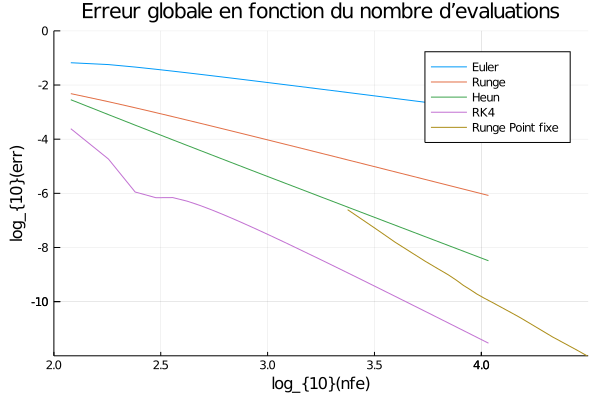

In [35]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
nb_itmax = 15
K_eps = 1e-12
N0 = [collect(120:60:1080); collect(1200:600:10800)]
Nmax = length(N0)
err_Euler = zeros(Nmax)
err_Runge = zeros(Nmax)
err_Heun = zeros(Nmax)
err_RK4 = zeros(Nmax)
err_RungePt = zeros(Nmax)
Nfe_RungePt = zeros(Nmax)

for i in 1:Nmax
    #s=1 donc N = nfe
    T_Euler, X_Euler = euler(vdp, tspan, x0, p, Int(N0[i]))
    err_Euler[i] = abs(x0[1] - last(X_Euler[:,1]))
    
    #s=2 donc N = nfe/2
    T_Runge, X_Runge = runge(vdp, tspan, x0, p, Int(N0[i]/2))
    err_Runge[i] = abs(x0[1] - last(X_Runge[:,1]))

    #s=3 donc N = nfe/3
    T_Heun, X_Heun = heun(vdp, tspan, x0, p, Int(N0[i]/3))
    err_Heun[i] = abs(x0[1] - last(X_Heun[:,1]))

    #s=4 donc N = nfe/4
    T_RK4, X_RK4 = rk4(vdp, tspan, x0, p, Int(N0[i]/4))
    err_RK4[i] = abs(x0[1] - last(X_RK4[:,1]))
    
    T_Gaussfp, X_Gaussfp, nfun_Gaussfp, ifail_Gaussfp = gauss_fp(vdp, tspan, x0, p, [N0[i], nb_itmax, K_eps])
    err_RungePt[i] = abs(x0[1] - last(X_Gaussfp[:,1]))
    Nfe_RungePt[i] = nfun_Gaussfp
end

plot(log10.(N0), log10.(err_Euler), label = "Euler")
plot!(log10.(N0), log10.(err_Runge), label = "Runge")
plot!(log10.(N0), log10.(err_Heun), label = "Heun")
plot!(log10.(N0), log10.(err_RK4), label = "RK4")
plot!(log10.(Nfe_RungePt), log10.(err_RungePt), label = "Runge Point fixe")
xlabel!("log_{10}(nfe)")
ylabel!("log_{10}(err)")
xlims!(2, 4.5)
ylims!(-12, 0)
title!("Erreur globale en fonction du nombre d’evaluations")


### Newton
#### Code

In [37]:
function gauss_newton(fun, dfun, tspan::Tuple{<:Real,<:Real}, x0::Vector{<:Real}, p::Vector{<:Real},
        option)::Tuple{Vector{Float64},Array{Float64,2},Int,Int,Array{Int,1}}
    # Numerical integration with Gauss scheme and the Newton algorithm
    #
    # Input parameters
    # ----------------
    # fun : second member of the ode
    #       fun(x,p,t)
    #       Input
    #       x      : state
    #                array(n)
    #       p      : vector of parameters
    #       t      : time
    #                real
    #       Output
    #       xpoint : value of fun
    #               array(n) 
    # tspan = (t0,tf)
    # x0    = initial point
    #         array(n)
    # option[1] = N = number of step
    #                 Integer
    # option[2] = maximum number of iterations for the Newton algorithm
    #             real
    # option[3] = epsilon for the test of progress in the Newton algorithm
    #             real
    #
    # Output parameters
    # -----------------
    # T = vector of time
    #     real(N+1)
    # X = Matrix of solution
    #     real(N+1,n)
    # The line i of [T X] contains ti and x_i the approximation of x(t_i)
    # ifail[i] = number of iteration for the fixed point on [t_i,t_{i+1}] if the fixed point converge
    # ifail[i] = -1 if the fixed point don't converge on [t_i,t_{i+1}]: maximum number of iteration
    # is attained in the fixed point
    #            integer(N)
    # nfun = number of evaluation of phi
    #        integer
    # ndfun = number of evaluation of the derivative of fun
    #         integer
    # ---------------------------------------------------------------------------------------------
    N, nb_itmax, eps = option
    N = Int(N)
    nb_it = 0
    
    n  = length(x0)             # dimension n
    T  = zeros(N+1)
    X  = zeros(N+1,n)
    nfun = 0
    ndfun = 0
    ifail = ones(Int,N)
    
    t0, tf = tspan
    h = (tf-t0)/N
    T = range(t0, stop=tf, length=N+1)
    #T = t0:h:tf
    X[1, :] = x0
    A = [1/4 1/4-√3/6; 1/4+√3/6 1/4]
    C = [1/2-√3/6, 1/2+√3/6]
    B = [1/2, 1/2]
    for i in 1:N
        T1 = T[i] + C[1]*h
        T2 = T[i] + C[2]*h
        k1 = fun(X[i, :], p, T1) #On initialise (k1)_0
        k2 = fun(X[i, :], p, T2) #On initialise (k2)_0
        nfun += 2
    
        delta = 2*eps #Valeur par défaut pour rentrer dans la boucle
        nb_it = 0 #Itération des suites (k_1) et (k_2)
        
        #Newton g(x) = x-f(x) ~ 0 <--> g'(x)ẟx = -g(x)
        while delta > eps && nb_it <= nb_itmax
            X1 = X[i, :] + h*(A[1,1]*k1 + A[1,2]*k2) #Pb sur les coefs
            F1 = fun(X1, p, T1)
            JF1 = dfun(X1, p, T1)
            X2 = X[i, :] + h*(A[2,1]*k1 + A[2,2]*k2)
            F2 = fun(X2, p, T2)
            JF2 = dfun(X2, p, T2)
            
            G1 = k1 - F1
            JG1 = [I-h*A[1,1]*JF1 -h*A[1,2]*JF1]
            G2 = k2 - F2
            JG2 = [-h*A[2,1]*JF2 I-h*A[2,2]*JF2] #Pb sur les coefs
            
            G = [G1; G2]   #Pb içi
            JG = [JG1; JG2]   #Pb içi
            #println(size(G))
            #println(size(JG))
            
            ẟK = JG\(-G) # JG(K)*ẟK = -G(K)
            
            k1n = k1 + [ẟK[1]; ẟK[2]]
            k2n = k2 + [ẟK[3]; ẟK[4]]
            
            nfun += 2
            ndfun += 2
            nb_it += 1
            
            delta = norm(ẟK)
            k1, k2 = k1n, k2n
        end

        if nb_it > nb_itmax
            ifail[i] = -1
        else
            ifail[i] = nb_it
        end

        Phi = B[1]*k1 + B[2]*k2
        X[i+1, :] = X[i, :] + h*Phi 
    end

    return T,X,nfun,ndfun,ifail
end

gauss_newton (generic function with 1 method)

In [38]:
A = [1/4 1/4-√3/6; 1/4+√3/6 1/4]
C = [1/2-√3/6, 1/2+√3/6]
B = [1/2, 1/2]
A[1,2]

-0.038675134594812866

#### Test dans le cas N = 10, nb_itmax = 15 et K_eps = 1.e-12

In [39]:
function dvdp(x::Vector{<:Real},p::Vector{<:Real},t::Real)::Matrix{<:Real}
# Van der Pol model
# derivative of the second member of the IVP
# x : state
#     real(n)
# p : paramter vector
# t : time, variable not use here
#     real
# Output
# Xpoint::Jacobian matrix{<:Real},
#       real(n,n)
# --------------------------------------
    n = length(x)
    Jac = ones(n,n)
    Jac[1, 1] = 0
    Jac[1, 2] = 1
    Jac[2, 1] = -2*x[1]*x[2]-1
    Jac[2, 2] = 1-x[1]^2
    
    return Jac
end

dvdp (generic function with 1 method)

In [40]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N = 10
nb_itmax = 15
K_eps = 1e-6
option = [N, nb_itmax, K_eps]

println("Gauss fp")
T_gauss_newton, X_gauss_newton, nfun_gauss_newton, ndfun_gauss_newton, ifail_gauss_newton = gauss_newton(vdp, dvdp, tspan, x0, p, option)
affiche(T_gauss_newton, X_gauss_newton)
println("nfun_Gauss_Newton = ")
println(nfun_gauss_newton)
println("ndfun_Gauss_Newton = ")
println(ndfun_gauss_newton)
println("ifail  = ")
println(ifail_gauss_newton)

Gauss fp
   0.000000000000000    2.008619860874843    0.000000000000000
   0.666328685932313    1.748103353412420   -0.614524376585803
   1.332657371864626    1.227167371665737   -0.975642346688062
   1.998986057796939    0.345201034491682   -1.812011679746201
   2.665314743729252   -1.241634876414838   -2.475102844185241
   3.331643429661565   -2.013908638346081   -0.001153761617750
   3.997972115593878   -1.753891509975080    0.612895411728274
   4.664300801526191   -1.235024728110440    0.970518388811259
   5.330629487458504   -0.359136669330347    1.797486858502427
   5.996958173390817    1.222255698893968    2.495430848815410
   6.663286859323130    2.014631461651370    0.015689664812240
nfun_Gauss_Newton = 
96
ndfun_Gauss_Newton = 
76
ifail  = 
[4, 3, 3, 4, 5, 4, 3, 3, 4, 5]


In [41]:
k = [[0.0, -2.0086198608748433] [0.0, -2.0086198608748433]]
A1 = [0.25, -0.038675134594812866]
println(size(A1'))
println(size(k))
println((A1'))
println(k)
println(k*A1)

(1, 2)
(2, 2)
[0.25 -0.038675134594812866]
[0.0 0.0; -2.0086198608748433 -2.0086198608748433]
[0.0, -0.424471321749562]


#### Graphique 2

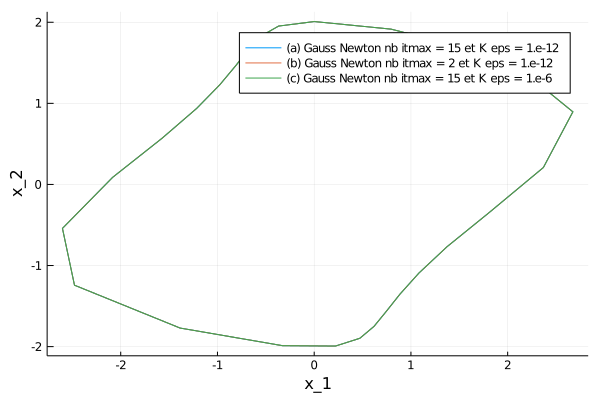

In [44]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
N = 25

T_gauss_newton1, X_gauss_newton1, nfun_gauss_newton1, ndfun_gauss_newton1, ifail_gauss_newton1 = gauss_newton(vdp, dvdp, tspan, x0, p, [N, 15, 1.e-12])
T_gauss_newton2, X_gauss_newton2, nfun_gauss_newton2, ndfun_gauss_newton2, ifail_gauss_newton2 = gauss_newton(vdp, dvdp, tspan, x0, p, [N, 2, 1.e-12])
T_gauss_newton3, X_gauss_newton3, nfun_gauss_newton3, ndfun_gauss_newton3, ifail_gauss_newton3 = gauss_newton(vdp, dvdp, tspan, x0, p, [N, 15, 1.e-6])
plot(X_gauss_newton1[:, 2], X_gauss_newton1[:, 1], label = "(a) Gauss Newton nb itmax = 15 et K eps = 1.e-12", lw = 1)
plot!(X_gauss_newton2[:, 2], X_gauss_newton2[:, 1], label = "(b) Gauss Newton nb itmax = 2 et K eps = 1.e-12", lw = 1)
plot!(X_gauss_newton3[:, 2], X_gauss_newton3[:, 1], label = "(c) Gauss Newton nb itmax = 15 et K eps = 1.e-6", lw = 1)
xlabel!("x_1")
ylabel!("x_2")

#### Ordre

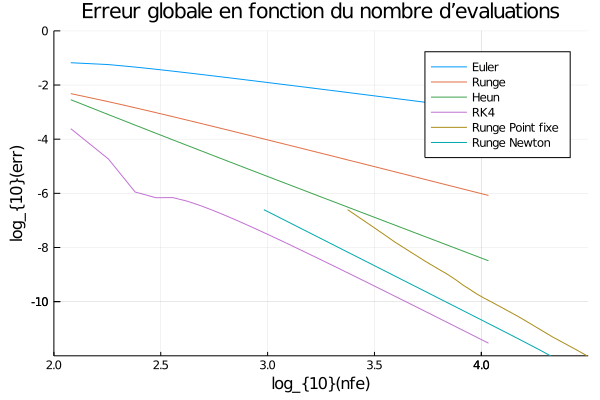

In [43]:
mu = 1
p = [mu]
tf = 6.6632868593231301896996820305
tspan = (0.0, tf)
x0 = [2.00861986087484313650940188,0]
nb_itmax = 15
K_eps = 1e-12
N0 = [collect(120:60:1080); collect(1200:600:10800)]
Nmax = length(N0)
err_Euler = zeros(Nmax)
err_Runge = zeros(Nmax)
err_Heun = zeros(Nmax)
err_RK4 = zeros(Nmax)
err_RungePt = zeros(Nmax)
Nfe_RungePt = zeros(Nmax)
err_RungeNewton = zeros(Nmax)
Nfe_RungeNewton = zeros(Nmax)

for i in 1:Nmax
    #s=1 donc N = nfe
    T_Euler, X_Euler = euler(vdp, tspan, x0, p, Int(N0[i]))
    err_Euler[i] = abs(x0[1] - last(X_Euler[:,1]))
    
    #s=2 donc N = nfe/2
    T_Runge, X_Runge = runge(vdp, tspan, x0, p, Int(N0[i]/2))
    err_Runge[i] = abs(x0[1] - last(X_Runge[:,1]))

    #s=3 donc N = nfe/3
    T_Heun, X_Heun = heun(vdp, tspan, x0, p, Int(N0[i]/3))
    err_Heun[i] = abs(x0[1] - last(X_Heun[:,1]))

    #s=4 donc N = nfe/4
    T_RK4, X_RK4 = rk4(vdp, tspan, x0, p, Int(N0[i]/4))
    err_RK4[i] = abs(x0[1] - last(X_RK4[:,1]))
    
    T_Gaussfp, X_Gaussfp, nfun_Gaussfp, ifail_Gaussfp = gauss_fp(vdp, tspan, x0, p, [N0[i], nb_itmax, K_eps])
    err_RungePt[i] = abs(x0[1] - last(X_Gaussfp[:,1]))
    Nfe_RungePt[i] = nfun_Gaussfp
    
    T_gauss_newton, X_gauss_newton, nfun_gauss_newton, ndfun_gauss_newton, ifail_gauss_newton = gauss_newton(vdp, dvdp, tspan, x0, p, [N0[i], nb_itmax, K_eps])
    err_RungeNewton[i] = abs(x0[1] - last(X_gauss_newton[:,1]))
    Nfe_RungeNewton[i] = nfun_gauss_newton
end

plot(log10.(N0), log10.(err_Euler), label = "Euler")
plot!(log10.(N0), log10.(err_Runge), label = "Runge")
plot!(log10.(N0), log10.(err_Heun), label = "Heun")
plot!(log10.(N0), log10.(err_RK4), label = "RK4")
plot!(log10.(Nfe_RungePt), log10.(err_RungePt), label = "Runge Point fixe")
plot!(log10.(Nfe_RungeNewton), log10.(err_RungeNewton), label = "Runge Newton")
xlabel!("log_{10}(nfe)")
ylabel!("log_{10}(err)")
xlims!(2, 4.5)
ylims!(-12, 0)
title!("Erreur globale en fonction du nombre d’evaluations")